In [1]:
import nibabel as nb
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
datasets = list(('BNU1', 'BNU3', 'HCP500', 'Jung2015', 'KKI2009', 'MRN114', 'NKI1', 'NKIENH', 'SWU4'))
files = list()
for f in datasets:
    files.append([f + '/' + single for single in os.listdir(f)])

----------
Scan: BNU1_0025864_1_DTI.nii.gz
Shape of B0 volume: (128, 128, 62)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


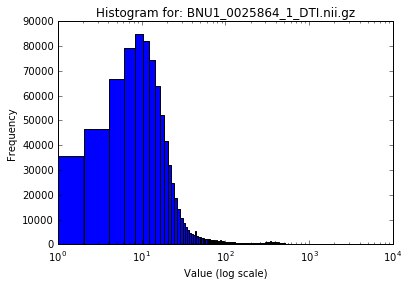

----------
Scan: BNU3_0027055_1_DTI.nii.gz
Shape of B0 volume: (128, 128, 49)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


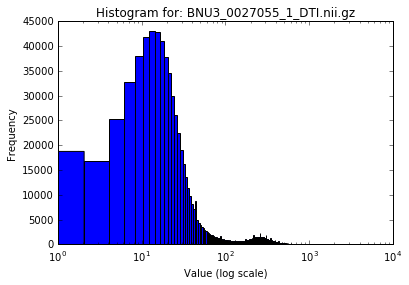

----------
Scan: HCP500_140117_96LR_DTI.nii.gz
Shape of B0 volume: (144, 168, 111)
Datatype: int16
Min: 0 (-32768)
Max: 31698 (32767)


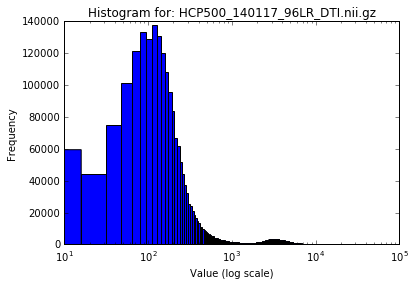

----------
Scan: Jung2015_M87100374_1_DTI.nii.gz
Shape of B0 volume: (104, 96, 66)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


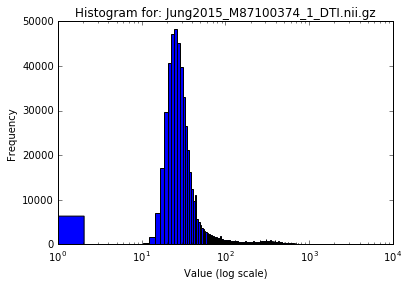

----------
Scan: KKI2009_113_1_DTI.nii
Shape of B0 volume: (256, 256, 65)
Datatype: float32
Min: 0.0 (-3.40282e+38)
Max: 552762.5 (3.40282e+38)


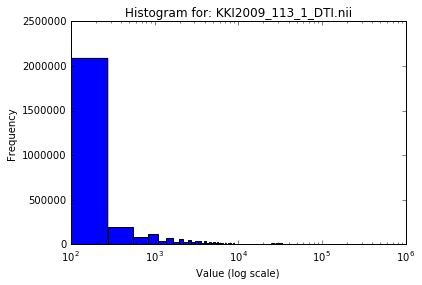

----------
Scan: MRN114_M87102217_1_DTI.nii
Shape of B0 volume: (128, 128, 72)
Datatype: int16
Min: 0 (-32768)
Max: 3949 (32767)


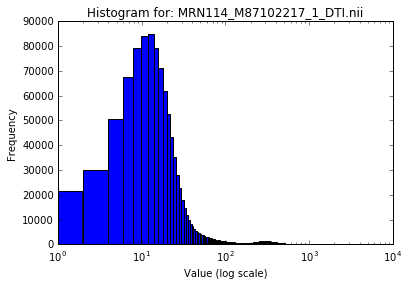

----------
Scan: NKI24_0021001_1_DTI.nii
Shape of B0 volume: (106, 90, 64)
Datatype: int16
Min: 0 (-32768)
Max: 873 (32767)


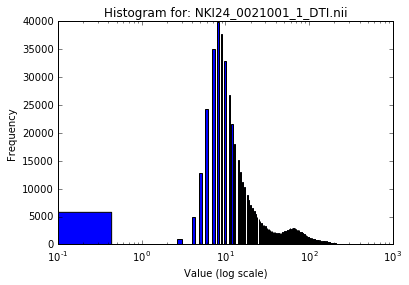

----------
Scan: NKIENH_0101084_1_DTI.nii
Shape of B0 volume: (106, 90, 64)
Datatype: int16
Min: 0 (-32768)
Max: 1934 (32767)


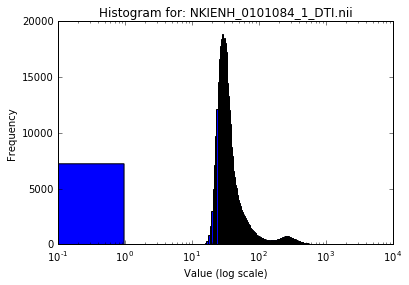

----------
Scan: SWU4_0025824_1_DTI.nii.gz
Shape of B0 volume: (128, 124, 60)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


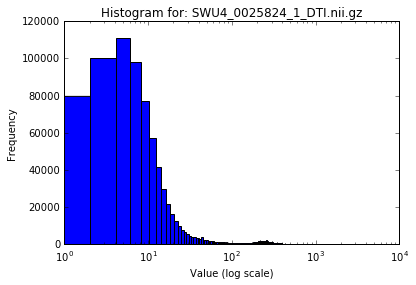

In [3]:
for scan in files:
    bval = np.loadtxt(scan[0])
    bval[np.where(bval==np.min(bval))] = 0
    im = nb.load(scan[2])
    b0_loc = np.where(bval==0)[0][0]
    dti = im.get_data()[:,:,:,b0_loc]

    print "----------"
    print "Scan: " + scan[2].split('/')[1]
    print "Shape of B0 volume: " + str(dti.shape)
    print "Datatype: " + str(dti.dtype)
    try:
        print "Min: " + str(dti.min()) + " (" + str(np.iinfo(dti.dtype).min) + ")"
        print "Max: " + str(dti.max()) + " (" + str(np.iinfo(dti.dtype).max) + ")"
    except ValueError:
        print "Min: " + str(dti.min()) + " (" + str(np.finfo(dti.dtype).min) + ")"
        print "Max: " + str(dti.max()) + " (" + str(np.finfo(dti.dtype).max) + ")"

    plt.hist(np.ravel(dti), bins=2000) #adding 1 to prevent divide by 0
    plt.title('Histogram for: ' + str(scan[2]).split('/')[1])
    plt.xscale('log')
    plt.xlabel("Value (log scale)")
    plt.ylabel("Frequency")
    plt.show()